In [1]:
import torch 
from torch.autograd import Variable 
import torch.nn as nn 
import torch.optim as optim 
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision 
import torchvision.transforms as transforms 

In [2]:
transform = transforms.Compose( # we're going to use this to transform our data to make each sample more uniform
   [
    transforms.Resize((90, 160)),  # Resizing to a standard size for all images in the dataset
    transforms.RandomHorizontalFlip(0.2),   # Horizontally flipping 20% of images (on avg), to enhance the dataset 
    transforms.ToTensor(), # Converting from PIL Image format to (0-1, 0-1, 0-1) FloatTensor format
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalizing the tensor for easier convergence
   ]) 

# Loading the Training Folder from its root directory
trainset = torchvision.datasets.ImageFolder (root="Documents/Image Data/Training Data/", transform=transform) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Loading the Test Folder from its root directory
testset = torchvision.datasets.ImageFolder(root='Documents/Image Data/Test Data/', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True)

# Defining the two classes
classes = ('Indoor', 'Outdoor') 

# Part 2: Defining the neural network model and training it

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(90 * 160 * 3, 40) 
        self.fc2 = nn.Linear(40, 25)      # First hidden layer contains 40 nodes
        self.fc3 = nn.Linear(25, 2)       # Second hidden layer contains 25 nodes
        self.relu = nn.ReLU()             # Simple and efficient activation function for hidden layers
        self.sigmoid = nn.Sigmoid()       # Effective activation for binary classification problems

    def forward(self, x):
        x = x.view(-1, 90 * 160 * 3) 
        
        x = self.fc1(x)             
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

net = Net()

epochs = 4
LR = 0.05
loss_function = nn.CrossEntropyLoss()    
optimizer = optim.SGD(net.parameters(), lr=LR, weight_decay=0.01)

for epoch in range(epochs):
    
    train_loader_iter = iter(trainloader)
    runningLoss = 0.0
    
    print("Iteration: " + str(epoch + 1))
    
    for batch_idx, (inputs, labels) in enumerate(train_loader_iter):
        
        net.zero_grad()
        inputs, labels = Variable(inputs.float()), Variable(labels)
        output = net(inputs)
        loss = loss_function(output, labels)
      
        loss.backward()
        optimizer.step()
        
        runningLoss += loss.item()
        
        # Displaying Batch and Loss Information
        if (batch_idx % 10 == 0 and batch_idx != 0):
            print ("Batch: ", batch_idx)
            print ("Loss: ", runningLoss)
            runningLoss = 0.0
           
    print()
    

Iteration: 1
Batch:  10
Loss:  7.255900025367737
Batch:  20
Loss:  5.89459103345871
Batch:  30
Loss:  5.549682319164276
Batch:  40
Loss:  5.161115318536758
Batch:  50
Loss:  5.165858596563339

Iteration: 2
Batch:  10
Loss:  5.343132048845291
Batch:  20
Loss:  4.698153853416443
Batch:  30
Loss:  4.6446923315525055
Batch:  40
Loss:  4.649792373180389
Batch:  50
Loss:  4.354671061038971

Iteration: 3
Batch:  10
Loss:  4.748628526926041
Batch:  20
Loss:  4.185522764921188
Batch:  30
Loss:  4.1679408848285675
Batch:  40
Loss:  4.057537078857422
Batch:  50
Loss:  4.007552295923233

Iteration: 4
Batch:  10
Loss:  4.468534737825394
Batch:  20
Loss:  3.9084184765815735
Batch:  30
Loss:  3.8666523098945618
Batch:  40
Loss:  3.8314310908317566
Batch:  50
Loss:  3.722140371799469



In [4]:
# Computing and displaying accuracy on test data
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 92 %


# Part 3: CLI Tool for Individual Image Evaluation

In [5]:
from PIL import Image as PImage
from IPython.display import Image

def singleImgClassif(imgPath):
    
    im = PImage.open(imgPath)
    im = transforms.functional.resize(im, (90, 160))
    tensor = transforms.functional.to_tensor(im)
    tensor = transforms.functional.normalize(tensor, (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    var = Variable(tensor)
    out = net(var)
    _, pred = torch.max(out.data, 1)
    
    print (classes[pred])
    display(Image(filename=imgPath))

# Unit Tests

Outdoor


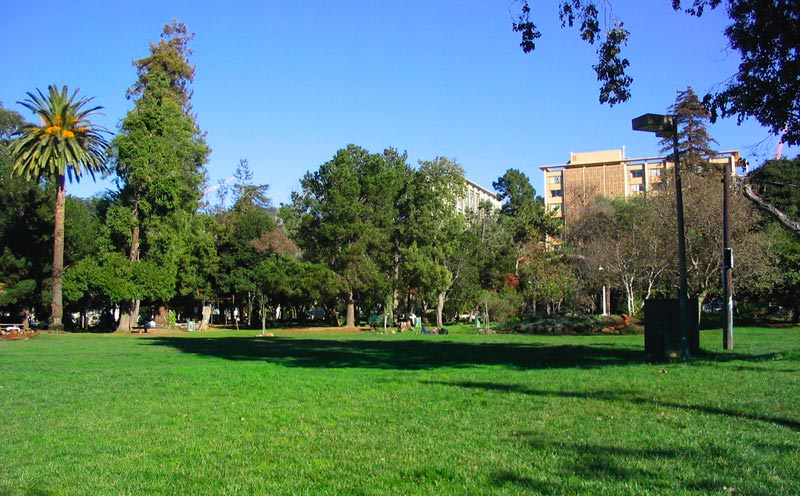

In [6]:
# Unit Test for Outdoors (Park)
singleImgClassif("Desktop/park.jpg")

Indoor


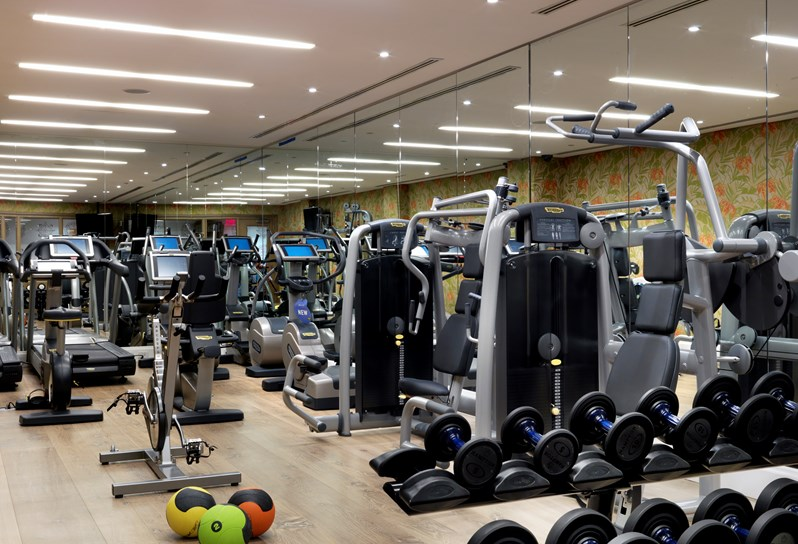

In [7]:
# Unit Test for Indoors (Gym)
singleImgClassif("Desktop/gym.jpg")